# Support Vector Machines (SVMs)

The practical exercise has been adapted for COMP8220 (Machine Learning) from an exercise of a course of Andrew Ng and a Python implementation of that exercise of Marco Peixeiro.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

Below is a function that will help you to plot each dataset for the subsequent SVM tasks.

In [2]:
def plot_data(X, y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes=None):
    plt.rcParams['figure.figsize'] = (20., 14.)
    
    pos = y[:, 0] == 1
    neg = y[:, 0] == 0
    
    if axes == None:
        axes = plt.gca()
    
    axes.scatter(X[pos][:,0], X[pos][:,1], marker='o', c='green', s=50, linewidth=2, label=pos_label)
    axes.scatter(X[neg][:,0], X[neg][:,1], marker='o', c='red', s=50, linewidth=2, label=neg_label)
    
    axes.set_xlim([xmin, xmax])
    axes.set_ylim([ymin, ymax])
    
    axes.set_xlabel(xlabel, fontsize=12)
    axes.set_ylabel(ylabel, fontsize=12)
    
    axes.legend(bbox_to_anchor=(1,1), fancybox=True)

## Part 1: SVM with Linear Kernel

For this task, you will implement a SVM using a linear kernel, and investigate the impact that the regularisation parameter C has on the hyperplane.

**Task 1:** Inspect the CSV file "data_1.csv", read that file into a panda dataframe, convert the dataframe to suitable numpy arrays and then plot them using the plot_data() function introduced above.

In [4]:
df_1 = pd.read_csv("data/data_1.csv")

X = df_1[['x', 'y']].to_numpy()
y = df_1[['label']].to_numpy()

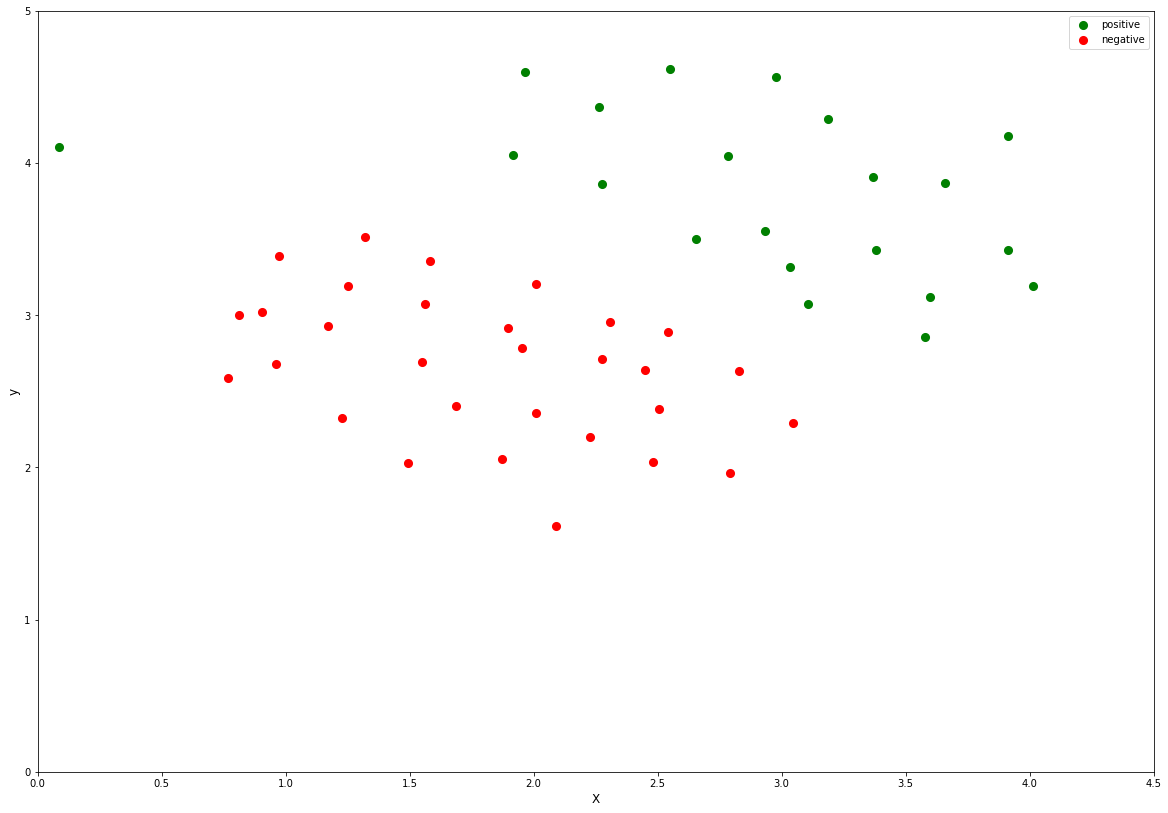

In [4]:
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.5, 0, 5)

You should see a green outlier on the left hand side of the plot. Now let us further investigate what impact the regularisation parameter C has on the hyperplane if we change that parameter (and what effect this has on the green outlier).

### SVM with small regularisation parameter 

**Task 2:** Fit a linear SVM to the data using sklearn.svm.SVC; set the regularisation parameter C to 1.0 and the decision_function_shape to 'ovr' (check here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html for details). Plot the data and use the predictions to plot the hyperplane (using the code below). 

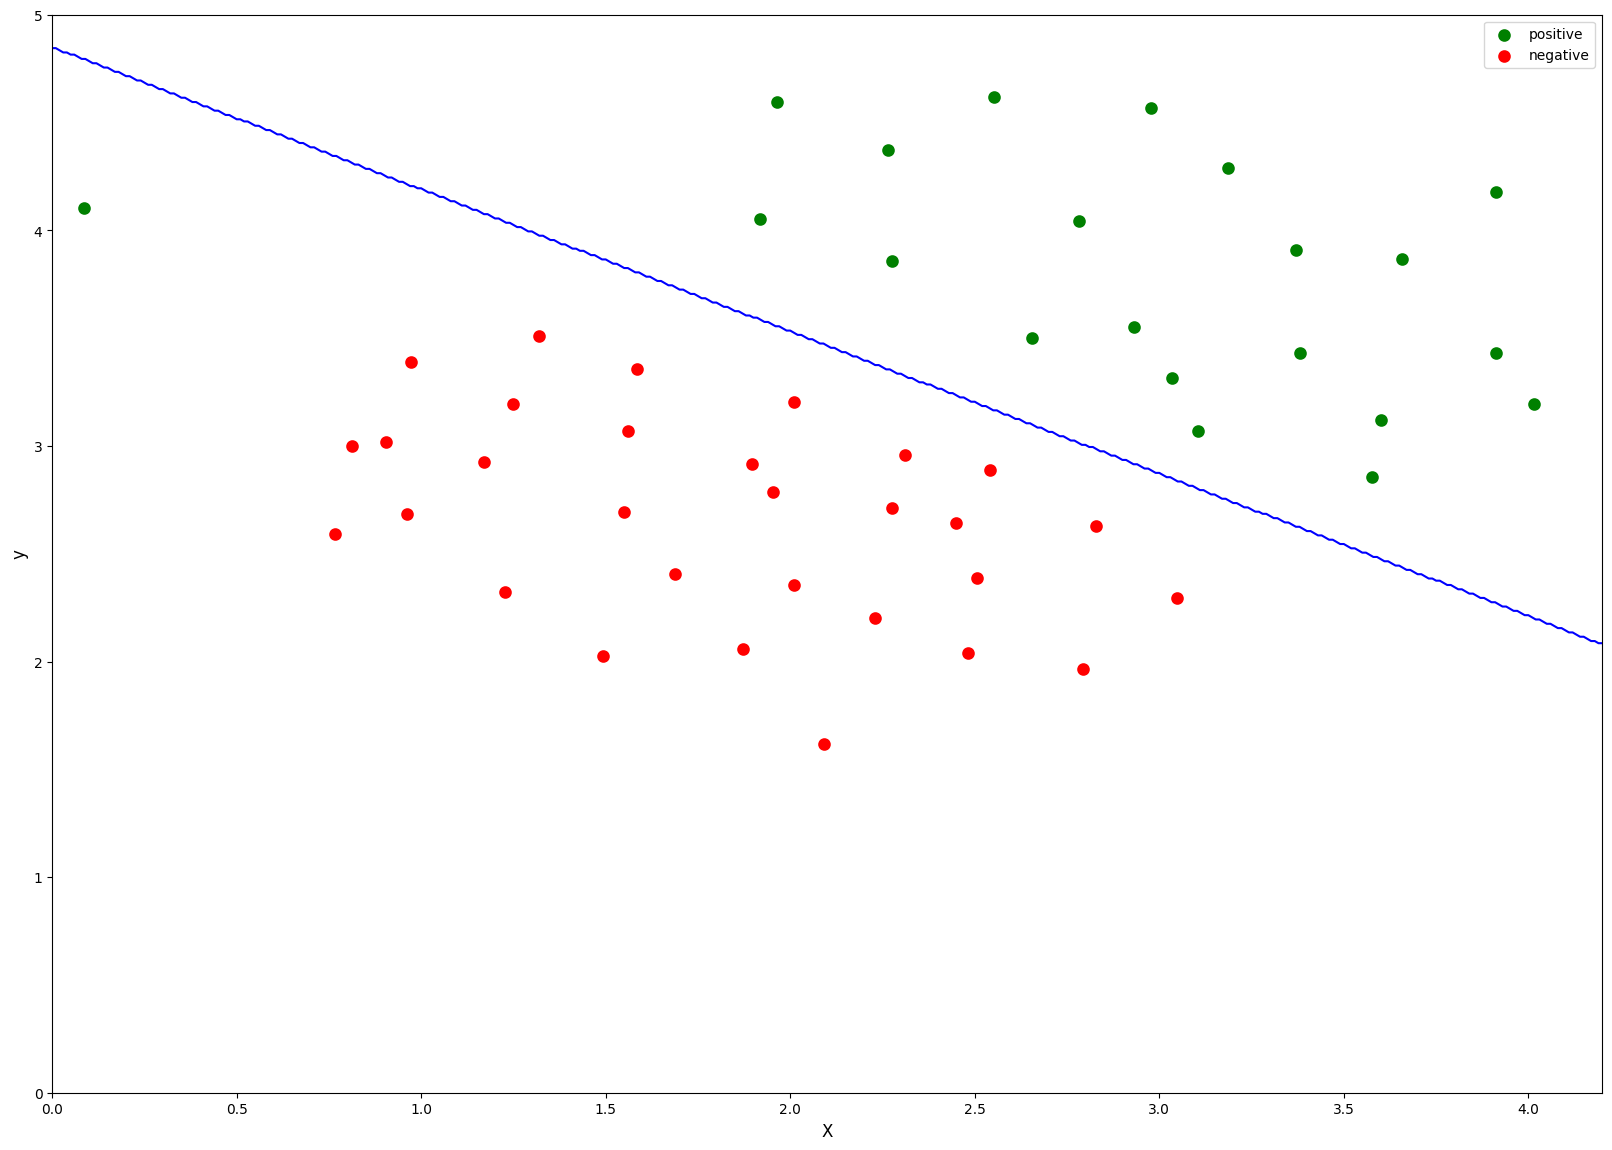

In [5]:
from sklearn import svm

# Use C=1
clf = svm.SVC(kernel='linear', C=1.0, decision_function_shape = 'ovr')
clf.fit(X, y.ravel())

# Plot data
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

# Plot hyperplane
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')
plt.show()

The result shows that the hyperplane ignored the green outlier. Let us see if we can fix that by changing the value of the regularisation parameter C.

### SVM with large regularization parameter 

**Task 3:**  Fit a linear SVM as in Task 2, but now set C to 100.0, plot the data and the hyperplane and study the output.

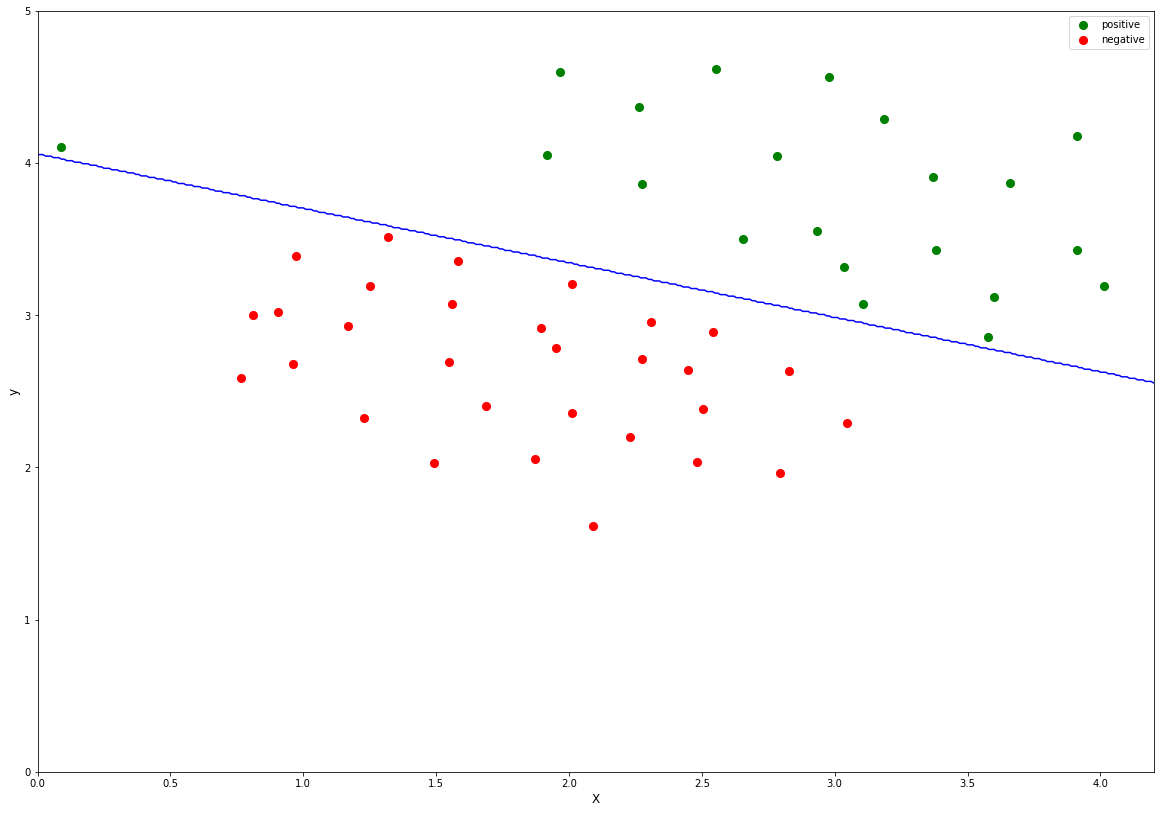

In [7]:
#Use C=100
clf100 = svm.SVC(kernel='linear', C=100.0, decision_function_shape='ovr')
clf100.fit(X, y.ravel())

# Plot data
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

# Plot hyperplane
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
Z = clf100.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')
plt.show()

The result shows that the green outlier is now on the correct side of the hyperplane, but we are now overfitting. This means that our decision boundary will most likely not perform well on unobserved data.

## Part 2: SVM with Gaussian Kernel

In order to accommodate non-linear boundaries, we need to change the kernel function. For this task, we will use a Gaussian kernel and use a more complex dataset.

**Task 4:** Inspect the CSV file "data_2.csv", read that file into a panda dataframe, convert the dataframe and plot the data (in a similar way as you have done this for Task 1).

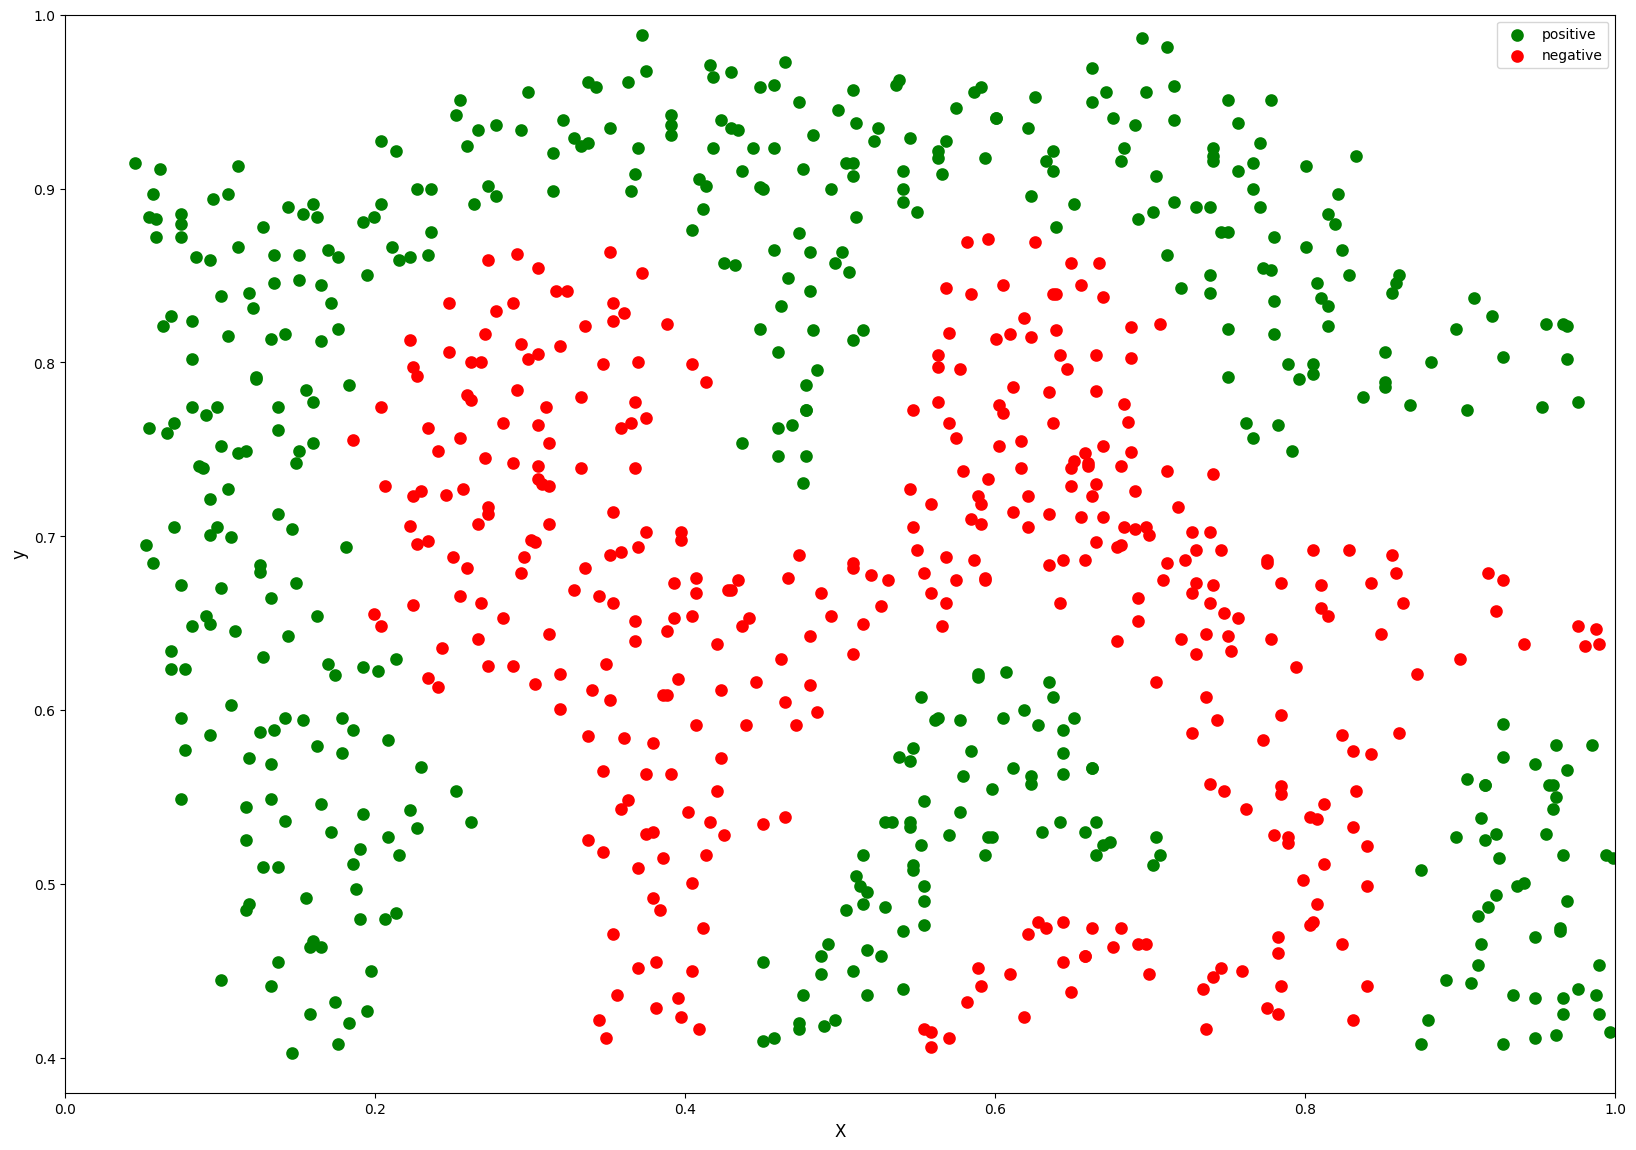

In [7]:
df_2 = pd.read_csv("data/data_2.csv")

X_2 = df_2[['x', 'y']].to_numpy()
y_2 = df_2[['label']].to_numpy()

plot_data(X_2, y_2, 'X', 'y', 'positive', 'negative', 0, 1.0, 0.38, 1)

**Task 5:** Now use a Gaussian kernel (rbf), set the hyperparameter gamma as specified below and set the hyperparameter C to 1.0, the shape of the decision function is still the same as before (one-versus-rest). For details check again: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html .
    


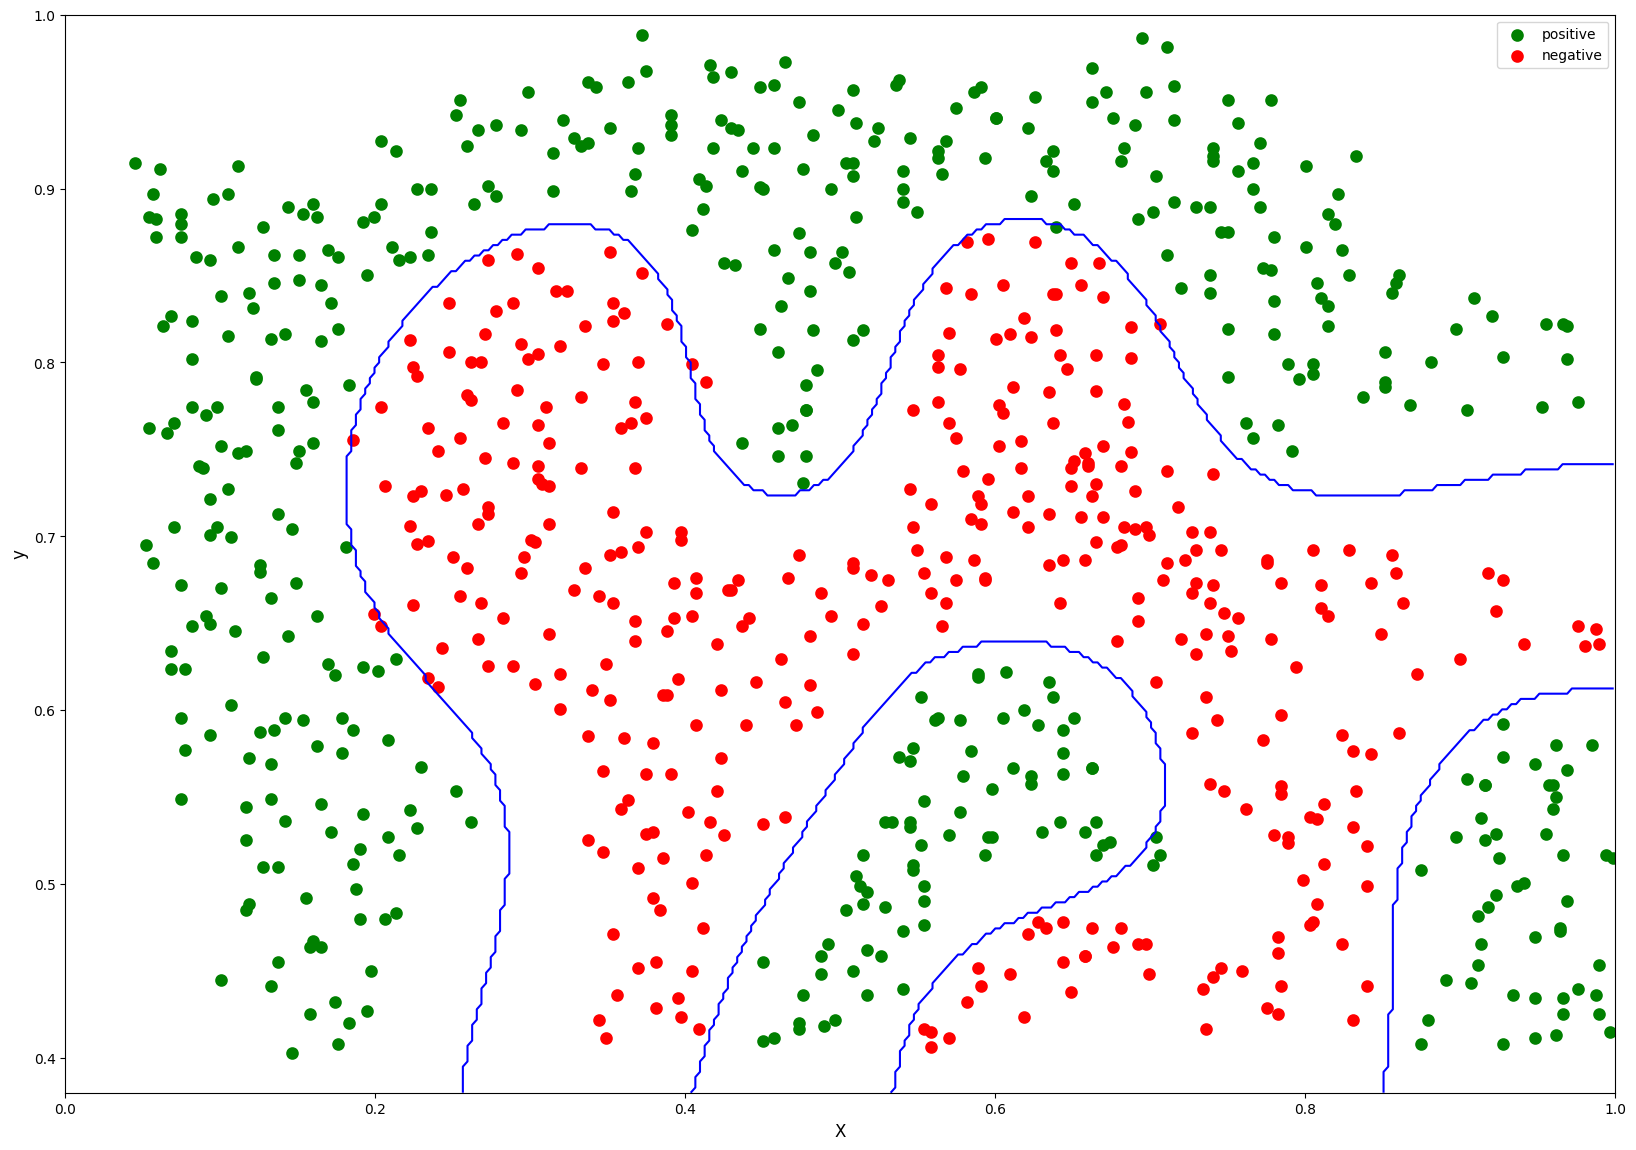

In [8]:
sigma = 0.1
gamma = 1/(2 * sigma**2)

clfg = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
clfg.fit(X_2, y_2.ravel())

plot_data(X_2, y_2, 'X', 'y', 'positive', 'negative', 0, 1, 0.38, 1)

x_1, x_2 = np.meshgrid(np.arange(0.0, 1.0, 0.003), np.arange(0.38, 1.0, 0.003))
Z = clfg.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')
plt.show()

The hyperplane does a pretty good job classifying most of the data. Try different values for sigma in order to see what kind of impacts it has on the hyperplane. Remember increasing the gamma value makes the bell-shaped curve narrower and the decision boundary ends up getting more irregular; decreasing the gamma value makes the bell-shaped curve wider making the decision boundary smoother.

## Part 3: SVM with Cross-validation

Cross-validation will help us to find the best parameter seetting.

**Task 5:** Inspect the CSV file "data_3.csv", then read the relevant information into a dataframe, convert that dataframe so that you can plot the data using the plot_data() function.

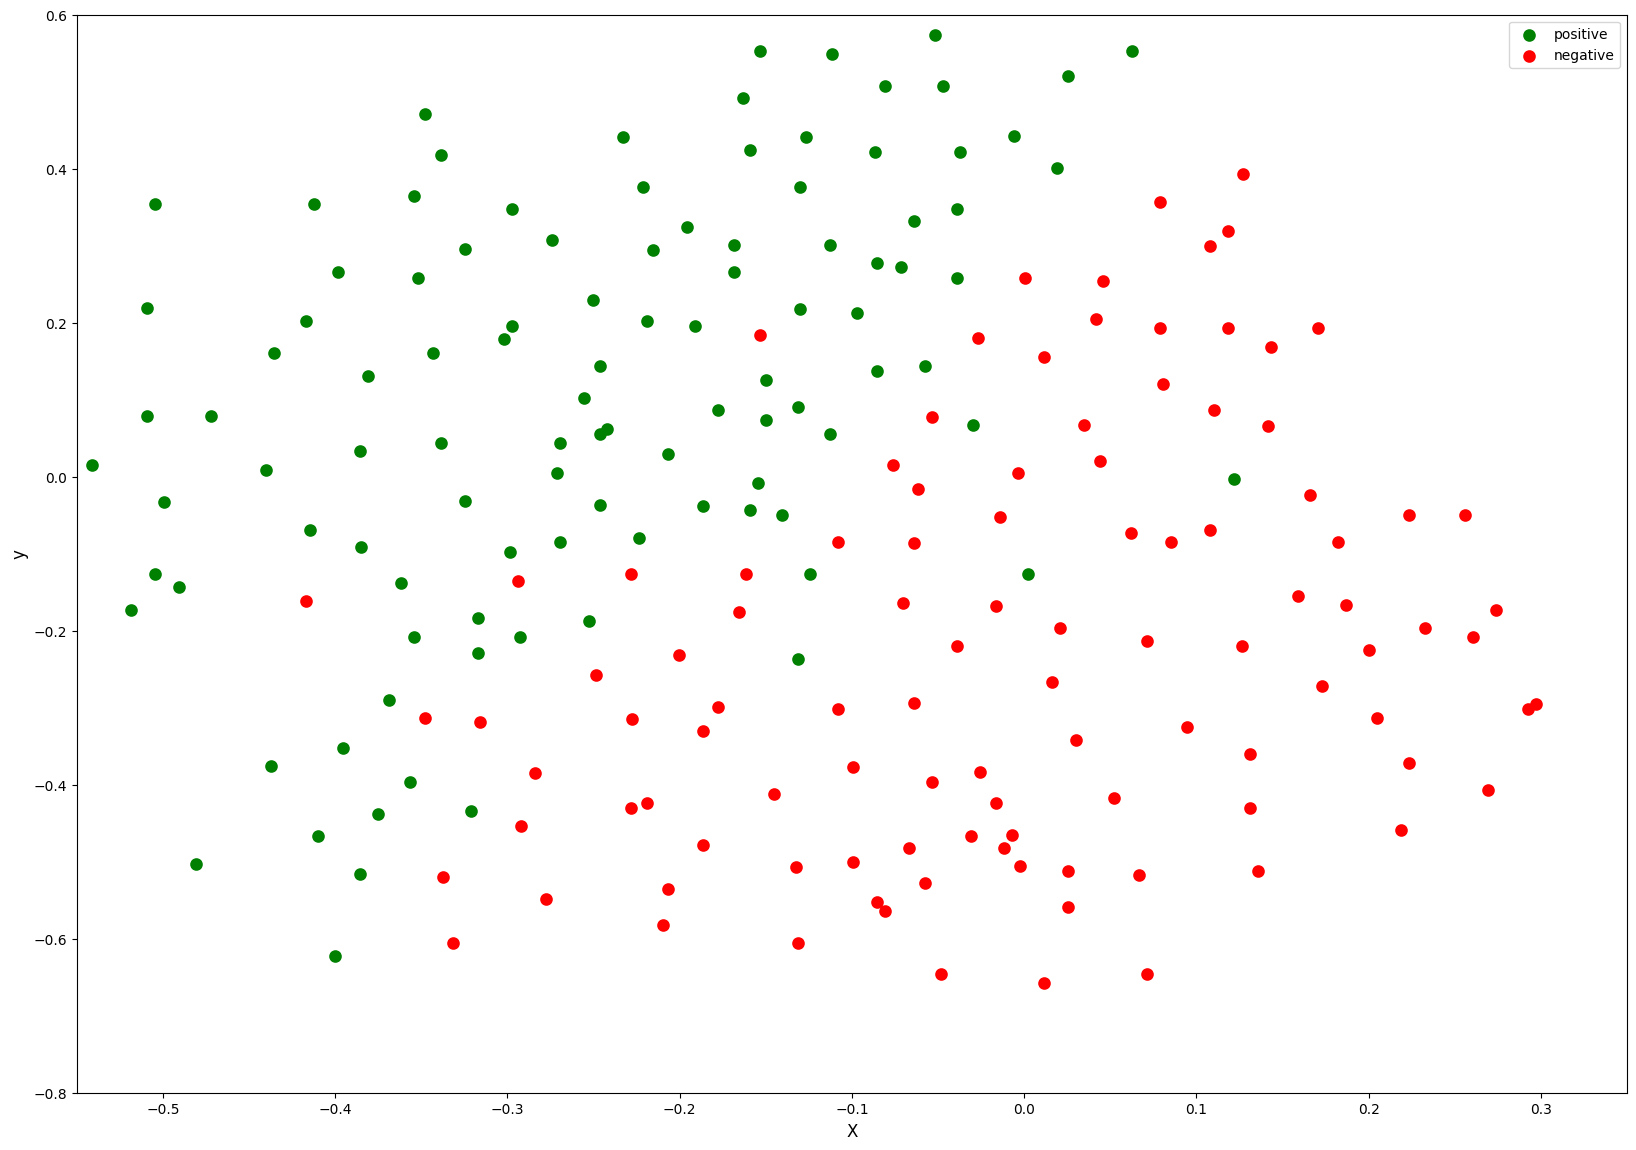

In [10]:
df_3 = pd.read_csv("data/data_3.csv")

X_3 = df_3.loc[:, ['x', 'y']].to_numpy()
y_3 = df_3.loc[:, ['label']].to_numpy()

plot_data(X_3, y_3, 'X', 'y', 'positive', 'negative', -0.55, 0.35, -0.8, 0.6)

Note that the plot contains overlapping classes. Our hyperplane will not be perfect, but we will use cross-validation to find those parameters that will offer the best solution.

**Task 6:** Use the relevant information from the CSV file (data_3.csv) and complete the code below in order to print the optimal values for sigma and for C.

In [11]:
Xval =  df_3.loc[0:199, ['xval', 'yval']].to_numpy()
yval =  df_3.loc[0:199, ['labelval']].to_numpy()

sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

errors = list()
sigma_c = list()

for each in sigma:
    for each_c in C:
        clf = svm.SVC(kernel='rbf', gamma = 1/(2*(each**2)), C=each_c, decision_function_shape='ovr')
        clf.fit(X_3, y_3.ravel())
        errors.append(clf.score(Xval, yval.ravel()))
        sigma_c.append((each, each_c))

In [12]:
index = np.argmax(errors)

sigma_max, c_max = sigma_c[index]

print('The optimal value of sigma is: {}'.format(sigma_max))
print('The optimal value of C is: {}'.format(c_max))

The optimal value of sigma is: 0.1
The optimal value of C is: 1


**Task 7:** Now use the optimal values for sigma and for the regularisation parameter C to generate the hyperplane.

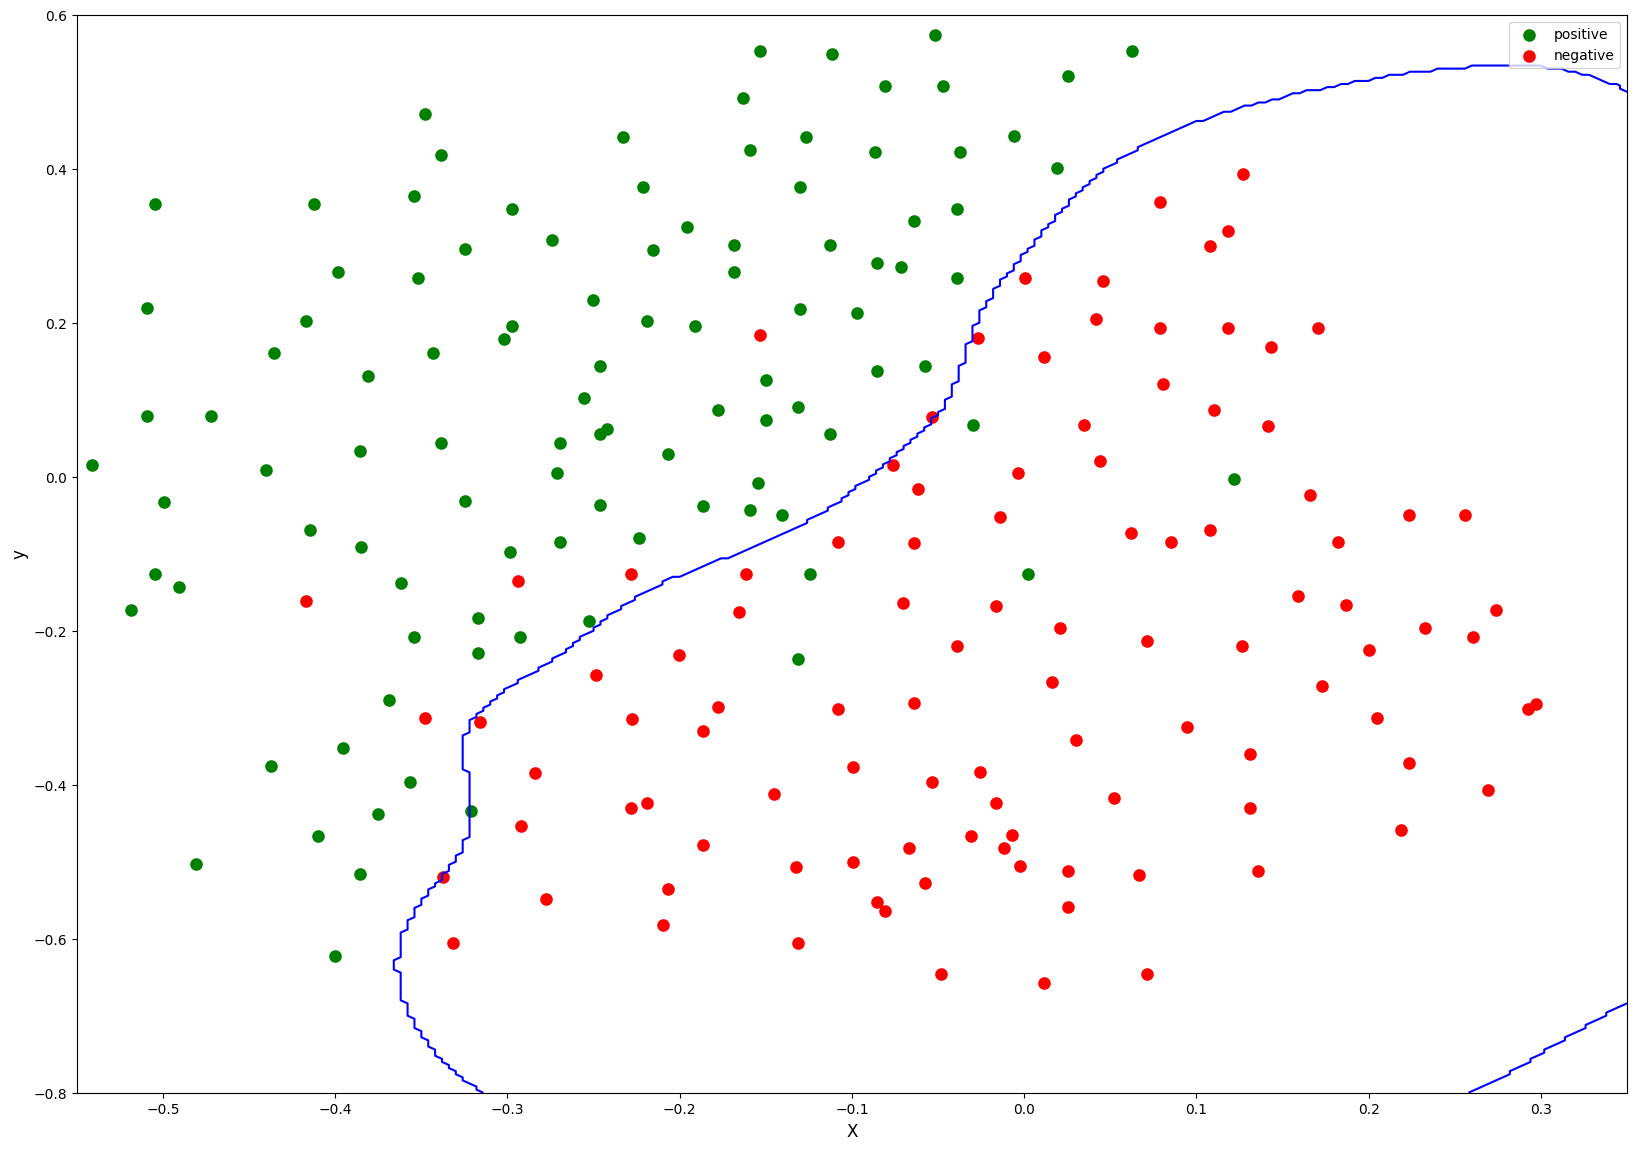

In [13]:
sigma= 0.1
gamma = 1/(2*(sigma**2))

optimal_clf = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
optimal_clf.fit(X_3, y_3.ravel())

plot_data(X_3, y_3, 'X', 'y', 'positive', 'negative', -0.55, 0.35, -0.8, 0.6)

x_1, x_2 = np.meshgrid(np.arange(-0.6, 0.4, 0.004), np.arange(-0.8, 0.6, 0.004))
Z = optimal_clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')
plt.show()

In [13]:
import pandas as pd

data = {'Name':['Peter', 'Gaurav', 'Claire', 'Anne'],
        'Age':[27, 24, 22, 32],
        'Qualification':['MSc', 'MA', 'MBA', 'PhD']}

df = pd.DataFrame(data)

print(df[['Name', 'Qualification']])



     Name Qualification
0   Peter           MSc
1  Gaurav            MA
2  Claire           MBA
3    Anne           PhD


In [15]:
import numpy as np
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

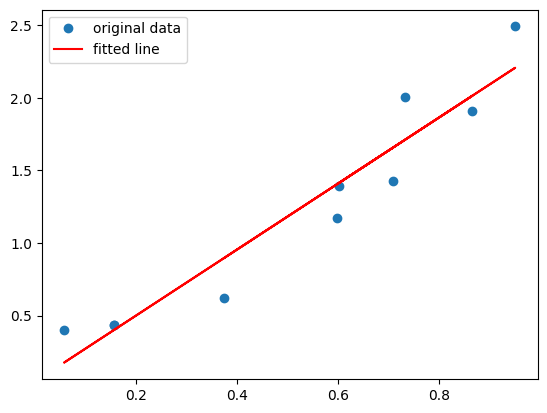

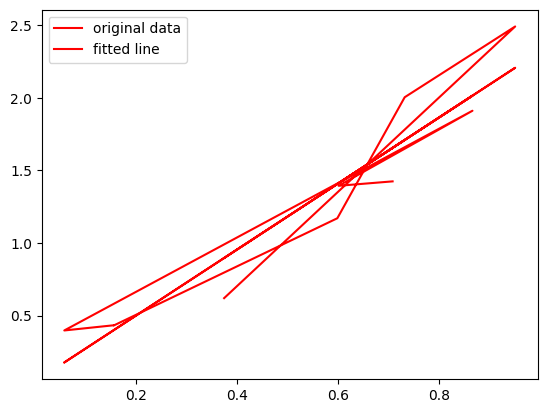

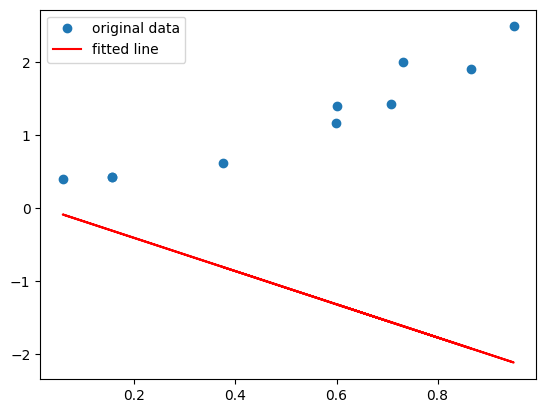

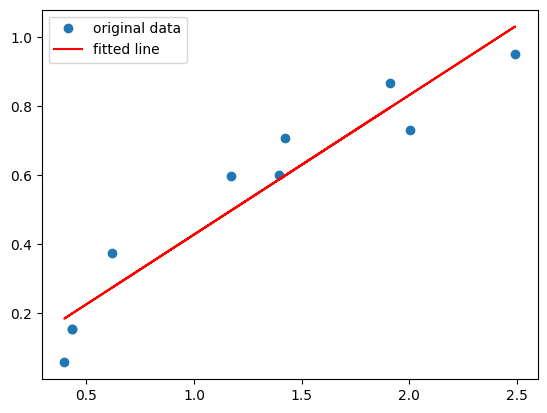

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

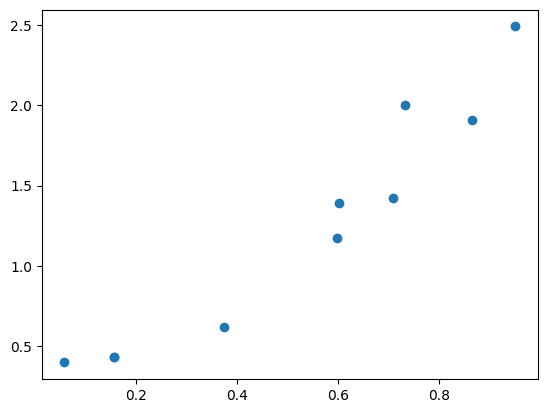

In [17]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

slope, inter, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, inter + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()


# b.
 

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

slope, inter, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, y, 'r', label='original data')
plt.plot(x, inter + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()


# c.
 

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

slope, inter, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, inter - slope*x, 'r', label='fitted line')
plt.legend()
plt.show()


# d.
 

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
y = np.random.random(10)
x = 1.6*y + np.random.random(10)

slope, inter, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, inter + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()


# e.
 

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.random(10)
y = 1.6*x + np.random.random(10)

slope, inter, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, inter + slope, 'r', label='fitted line')
plt.legend()
plt.show()

In [1]:



# b.
# import matplotlib.pyplot as plt

data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}

names = list(data.keys())

values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize = (10, 3), sharey = True)

axs[0].bar(names, values)

axs[1].scatter(names, values)

axs[2].plot(names, values)

fig.suptitle('Categorical Plotting') 


# c.
import matplotlib.pyplot

data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}

names = list(data.keys())

values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize = (10, 3), sharey = True)

axs[0].bar(names, values)

axs[1].scatter(names, values)

axs[2].plot(names, values)

fig.suptitle('Categorical Plotting') 






NameError: name 'plt' is not defined

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()


In [3]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel